In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, boxcox
from sklearn.preprocessing import StandardScaler

In [105]:
!pip install scipy

In [106]:
!python -m pip install --upgrade pip

In [107]:
df = pd.read_csv("Fraud.csv")

In [108]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [109]:
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', 'oldbalanceDest': 'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})
df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [110]:
df.isnull().values.any()

np.False_

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldBalanceOrig  1048575 non-null  float64
 5   newBalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldBalanceDest  1048575 non-null  float64
 8   newBalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
 10  isFlaggedFraud  1048575 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 88.0+ MB


In [112]:
nan_sum = df['isFraud'].isna().sum()
print(nan_sum)

0


In [113]:
#Summary of Statistics of Numeric Variables
df.describe()

,step,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [114]:
df.describe(include=['object'])

,type,nameOrig,nameDest
count,1048575,1048575,1048575
unique,5,1048317,449635
top,CASH_OUT,C821145334,C985934102
freq,373641,2,98


In [115]:
Total_transactions = len(df)
normal = len(df[df.isFraud == 0])
fraudulent = len(df[df.isFraud == 1])
fraud_percentage = round(fraudulent/Total_transactions*100, 2)
print('Total number of Transactions are {}'.format(Total_transactions))
print('Number of Normal Transactions are {}'.format(normal))
print('Number of fraudulent transactions are {}'.format(fraudulent))
print('Percentage of Fraud Transactions is {}'.format(fraud_percentage))

Total number of Transactions are 1048575
Number of Normal Transactions are 1047433
Number of fraudulent transactions are 1142
Percentage of Fraud Transactions is 0.11


In [116]:
normal_percentage = round(normal/Total_transactions*100, 2)
print('Percentage of Normal Transactions is {}'.format(normal_percentage))

Percentage of Normal Transactions is 99.89


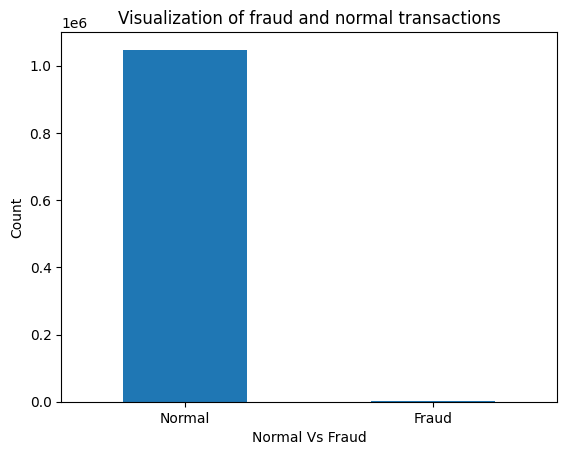

In [117]:
labels = ["Normal", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort=True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of fraud and normal transactions")
plt.ylabel("Count")
plt.xlabel("Normal Vs Fraud")
plt.xticks(range(2), labels)
plt.show()

type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64


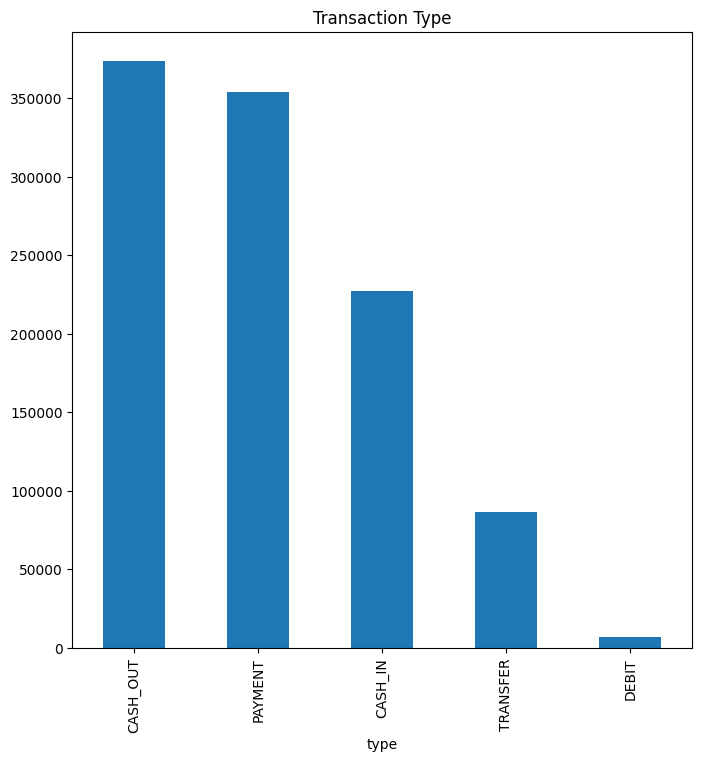

In [118]:
print(df.type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8,8))
df.type.value_counts().plot(kind='bar', title="Transaction Type", ax=ax, figsize=(8,8))
plt.show()

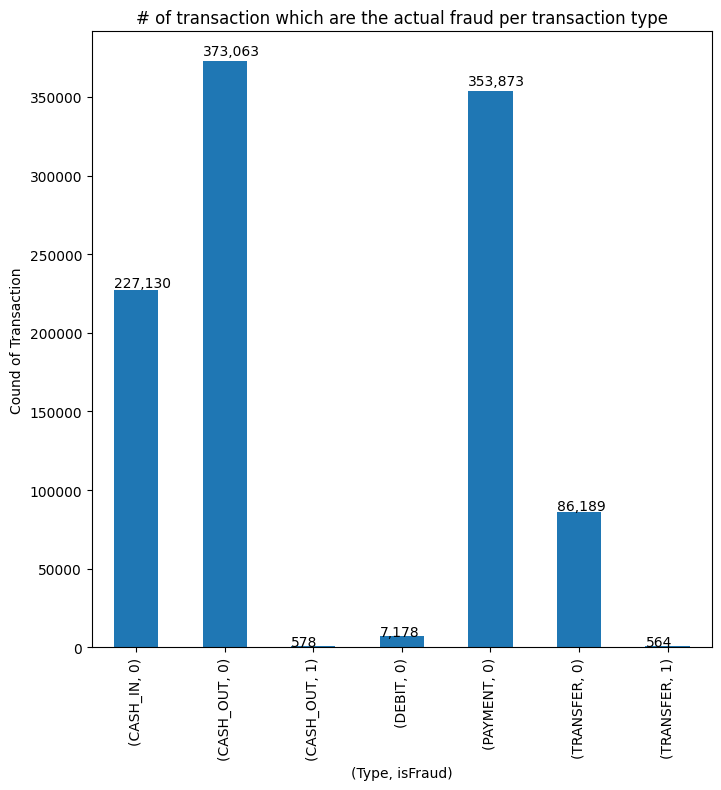

In [119]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar', figsize=(8,8))
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Cound of Transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [120]:
fraud_df = df[(df["isFraud"] == 1)]
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1142 entries, 2 to 1048324
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            1142 non-null   int64  
 1   type            1142 non-null   object 
 2   amount          1142 non-null   float64
 3   nameOrig        1142 non-null   object 
 4   oldBalanceOrig  1142 non-null   float64
 5   newBalanceOrig  1142 non-null   float64
 6   nameDest        1142 non-null   object 
 7   oldBalanceDest  1142 non-null   float64
 8   newBalanceDest  1142 non-null   float64
 9   isFraud         1142 non-null   int64  
 10  isFlaggedFraud  1142 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 107.1+ KB


In [121]:
non_fraud = len(fraud_df[fraud_df.isFraud == 0])
fraud = len(fraud_df[fraud_df.isFraud == 1])
print(non_fraud)
print(fraud)

0
1142


In [122]:
fraud_df.describe(include=['object'])

,type,nameOrig,nameDest
count,1142,1142,1142
unique,2,1142,1132
top,CASH_OUT,C409531429,C1827219533
freq,578,1,2


In [123]:
new_df = df.loc[df['type'].isin(['CASH_OUT', 'TRANSFER']),:]
print('The new dataframe now has', len(new_df), 'transactions.')

The new dataframe now has 460394 transactions.


In [124]:
new_df.describe(include=['object'])

,type,nameOrig,nameDest
count,460394,460394,460394
unique,2,460335,86109
top,CASH_OUT,C1214450722,C1286084959
freq,373641,2,63


In [125]:
print("Number of transactions where the transaction amount is negative: " + str(sum(new_df['amount'] < 0)))

print("Number of transactions where the transaction amount is 0: " + str(sum(new_df['amount'] == 0)))

Number of transactions where the transaction amount is negative: 0
Number of transactions where the transaction amount is 0: 0


In [126]:
trans_0 = new_df[new_df['amount'] == 0]
trans_0

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud


In [127]:
new_df = new_df.loc[new_df['amount'] > 0,:]

In [128]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460394 entries, 2 to 1048570
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            460394 non-null  int64  
 1   type            460394 non-null  object 
 2   amount          460394 non-null  float64
 3   nameOrig        460394 non-null  object 
 4   oldBalanceOrig  460394 non-null  float64
 5   newBalanceOrig  460394 non-null  float64
 6   nameDest        460394 non-null  object 
 7   oldBalanceDest  460394 non-null  float64
 8   newBalanceDest  460394 non-null  float64
 9   isFraud         460394 non-null  int64  
 10  isFlaggedFraud  460394 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 42.2+ MB


In [129]:
new_df_count = len(new_df)
orig_initial_balance = len(new_df[new_df.oldBalanceOrig == 0])
print("Percentage of transactions where originator's initial balance is 0: " + str(round((orig_initial_balance/new_df_count)*100, 2)))
dest_final_balance = len(new_df[new_df.newBalanceDest == 0])
print("Percentage of transactions where destination's final balance is 0: " + str(round(dest_final_balance/new_df_count*100, 2)))

Percentage of transactions where originator's initial balance is 0: 47.45
Percentage of transactions where destination's final balance is 0: 1.88


In [130]:
new_df['dest_final_balance'] = new_df['oldBalanceDest'] + new_df['amount']
new_df.head()
new_df['orig_final_balance'] = new_df['oldBalanceOrig'] - new_df['amount']
new_df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,dest_final_balance,orig_final_balance
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,21363.00,0.00
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,234216.94,-213808.94
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,237735.30,-214605.30
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,317952.89,-300850.89


In [131]:
c1 = len(new_df[new_df.newBalanceDest != new_df.dest_final_balance])
print("Transation where destination balance are not accurately captured: "+ str(round(c1/new_df_count*100, 2)))

c2 = len(new_df[new_df.newBalanceOrig != new_df.orig_final_balance])
print("Transactions where originator balances are not accurately captured: " + str(round(c2/new_df_count*100, 2)))

Transation where destination balance are not accurately captured: 57.59
Transactions where originator balances are not accurately captured: 93.73


In [132]:
fraud_trans = len(new_df[new_df.isFraud == 1])
c3 = len(new_df[(new_df.oldBalanceOrig == 0) & (new_df.isFraud == 1)])
print("% of fraudulent transactions where initial balance of orginator is 0: " + str(round(c3/fraud_trans*100, 2)))

gen_trans = len(new_df[new_df.isFraud == 0])
c4 = len(new_df[(new_df.oldBalanceOrig == 0) & (new_df.isFraud == 0)])
print("% of genuine transactions where initial balance of originator is 0: " + str(round(c4/gen_trans*100, 2)))

% of fraudulent transactions where initial balance of orginator is 0: 1.75
% of genuine transactions where initial balance of originator is 0: 47.56


In [133]:
new_df['origBalance_inacc'] = (new_df['oldBalanceOrig'] - new_df['amount']) - new_df['newBalanceOrig']
new_df['destBalance_inacc'] = (new_df['oldBalanceDest'] + new_df['amount']) - new_df['newBalanceDest']

In [134]:
new_df.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,dest_final_balance,orig_final_balance,origBalance_inacc,destBalance_inacc
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.00,0.00,0.00,181.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,21363.00,0.00,0.00,21363.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,234216.94,-213808.94,-213808.94,182703.5
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,237735.30,-214605.30,-214605.30,237735.3
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,317952.89,-300850.89,-300850.89,-2401220.0


In [135]:
new_df = new_df.drop(['nameOrig', 'nameDest','dest_final_balance', 'orig_final_balance', 'isFlaggedFraud'], axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460394 entries, 2 to 1048570
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   step               460394 non-null  int64  
 1   type               460394 non-null  object 
 2   amount             460394 non-null  float64
 3   oldBalanceOrig     460394 non-null  float64
 4   newBalanceOrig     460394 non-null  float64
 5   oldBalanceDest     460394 non-null  float64
 6   newBalanceDest     460394 non-null  float64
 7   isFraud            460394 non-null  int64  
 8   origBalance_inacc  460394 non-null  float64
 9   destBalance_inacc  460394 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 38.6+ MB


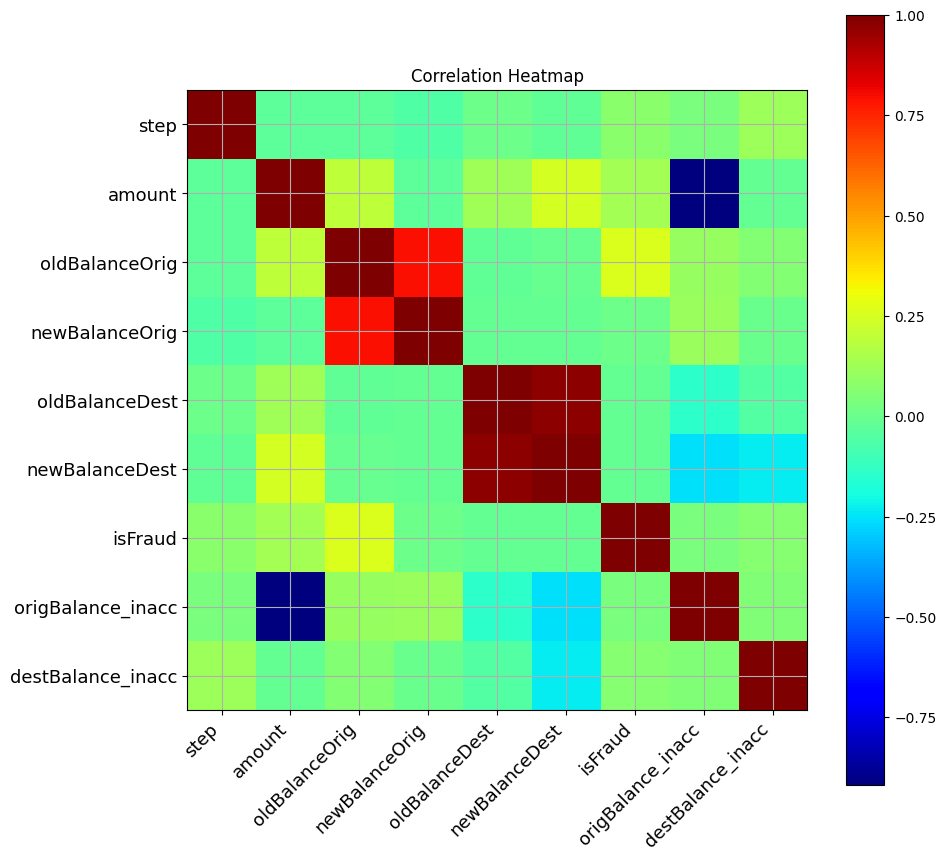

In [136]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

def correlation_plot(df):
  
    numeric_df = df.select_dtypes(include=['number'])
    corr_matrix = numeric_df.corr()
    cmap = plt.colormaps.get_cmap('jet')
    fig, ax = plt.subplots(figsize=(10, 10))
    cax = ax.imshow(corr_matrix, interpolation="nearest", cmap=cmap)
    ax.grid(True)
    plt.title("Correlation Heatmap")
    labels = numeric_df.columns.tolist()
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels, fontsize=13, rotation=45, ha="right")
    ax.set_yticklabels(labels, fontsize=13)
    fig.colorbar(cax)
    plt.show()
correlation_plot(new_df)

In [140]:
!pip install scikit-learn

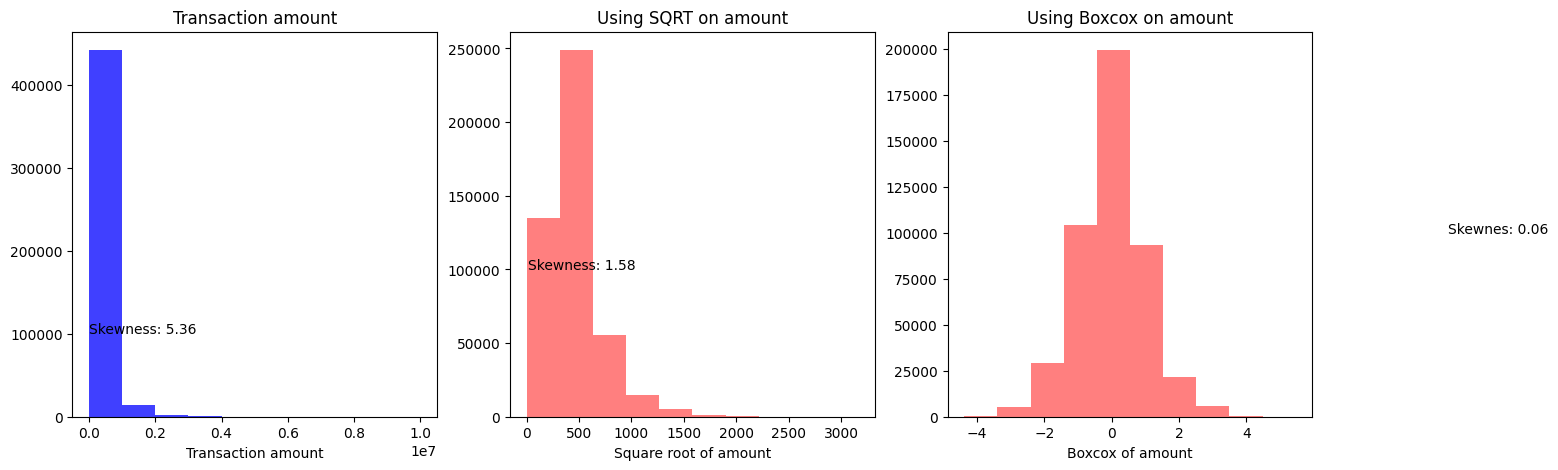

In [141]:
from scipy.stats import skew, boxcox
from sklearn import preprocessing

new_df['amount_boxcox'] = preprocessing.scale(boxcox(new_df['amount']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131)
plt.hist(new_df['amount'], facecolor='blue', alpha=0.75)
plt.xlabel("Transaction amount")
plt.title("Transaction amount")
plt.text(10, 100000, "Skewness: {0:.2f}".format(skew(new_df['amount'])))

figure.add_subplot(132)
plt.hist(np.sqrt(new_df['amount']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of amount")
plt.title("Using SQRT on amount")
plt.text(10,100000, "Skewness: {0:.2f}".format(skew(np.sqrt(new_df['amount']))))

figure.add_subplot(133)
plt.hist(new_df['amount_boxcox'], facecolor = "red", alpha=0.5)
plt.xlabel("Boxcox of amount")
plt.title("Using Boxcox on amount")
plt.text(10, 100000, "Skewnes: {0:.2f}".format(skew(new_df['amount_boxcox'])))

plt.show()

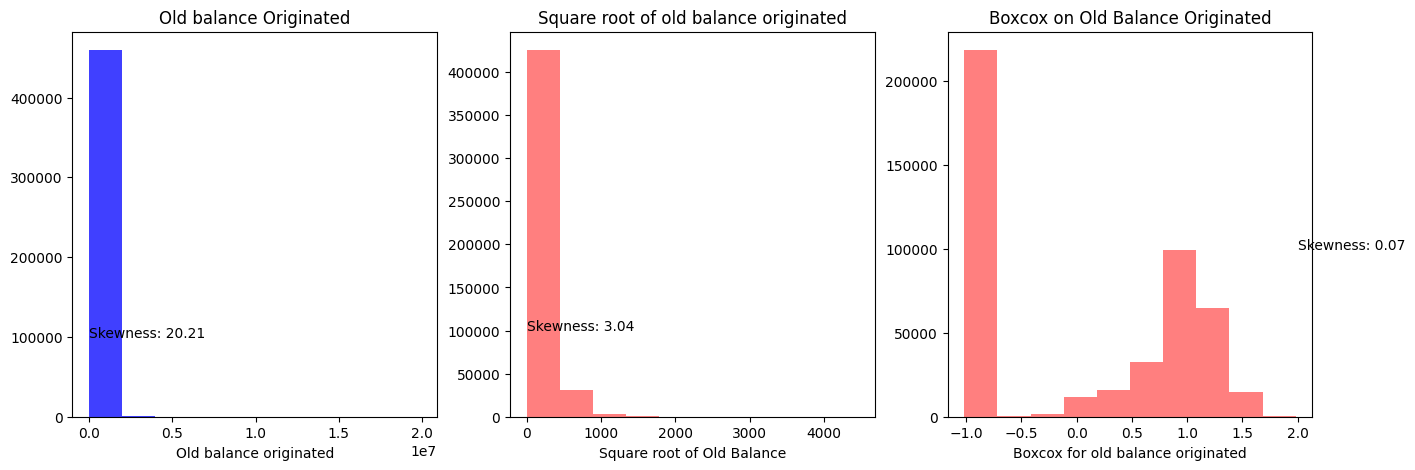

In [142]:
new_df['oldBalanceOrig_boxcox'] = preprocessing.scale(boxcox(new_df['oldBalanceOrig']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131)
plt.hist(new_df['oldBalanceOrig'], facecolor='blue', alpha=0.75)
plt.xlabel('Old balance originated')
plt.title("Old balance Originated")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(new_df["oldBalanceOrig"])))

figure.add_subplot(132)
plt.hist(np.sqrt(new_df['oldBalanceOrig']), facecolor="red", alpha=0.5)
plt.xlabel("Square root of Old Balance")
plt.title("Square root of old balance originated")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(new_df['oldBalanceOrig']))))

figure.add_subplot(133)
plt.hist(new_df['oldBalanceOrig_boxcox'], facecolor = "red", alpha=0.5)
plt.xlabel("Boxcox for old balance originated")
plt.title("Boxcox on Old Balance Originated")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(new_df['oldBalanceOrig_boxcox'])))

plt.show()

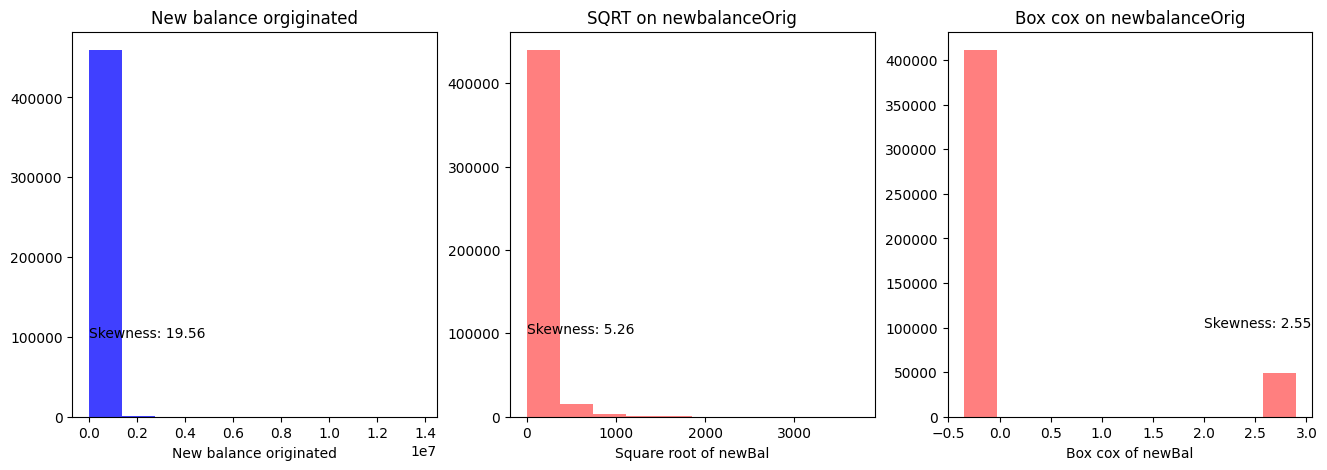

In [143]:
new_df['newbalanceOrg_boxcox'] = preprocessing.scale(boxcox(new_df['newBalanceOrig']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131) 
plt.hist(new_df['newBalanceOrig'] ,facecolor='blue',alpha=0.75) 
plt.xlabel("New balance originated") 
plt.title("New balance orgiginated") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(new_df['newBalanceOrig'])))


figure.add_subplot(132)
plt.hist(np.sqrt(new_df['newBalanceOrig']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of newBal")
plt.title("SQRT on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(new_df['newBalanceOrig']))))

figure.add_subplot(133)
plt.hist(new_df['newbalanceOrg_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of newBal")
plt.title("Box cox on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(new_df['newbalanceOrg_boxcox'])))

plt.show()

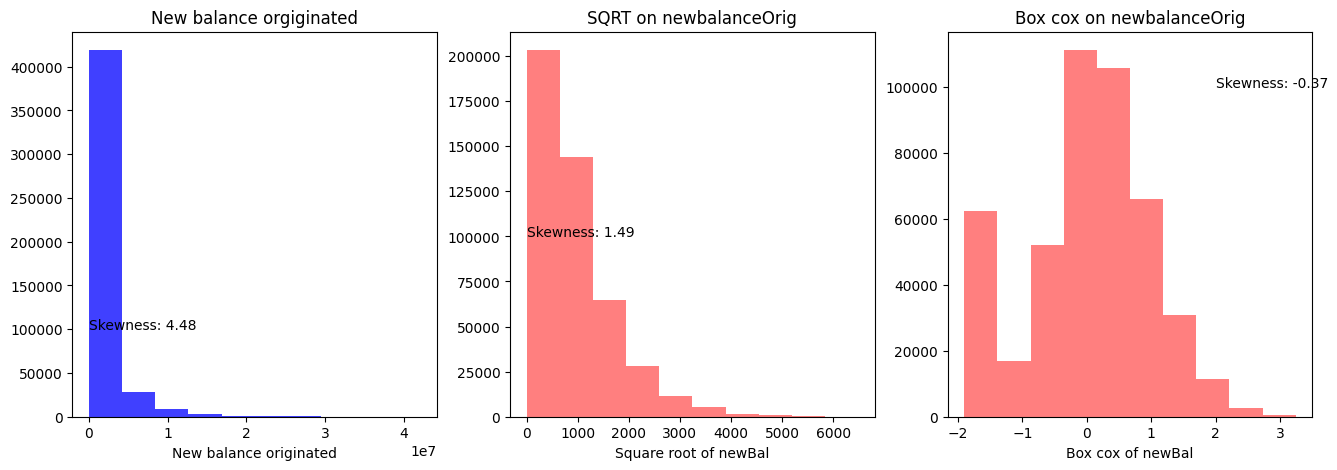

In [144]:
new_df['oldBalanceDest_boxcox'] = preprocessing.scale(boxcox(new_df['oldBalanceDest']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131) 
plt.hist(new_df['oldBalanceDest'] ,facecolor='blue',alpha=0.75) 
plt.xlabel("New balance originated") 
plt.title("New balance orgiginated") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(new_df['oldBalanceDest'])))


figure.add_subplot(132)
plt.hist(np.sqrt(new_df['oldBalanceDest']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of newBal")
plt.title("SQRT on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(new_df['oldBalanceDest']))))

figure.add_subplot(133)
plt.hist(new_df['oldBalanceDest_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of newBal")
plt.title("Box cox on newbalanceOrig")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(new_df['oldBalanceDest_boxcox'])))

plt.show()

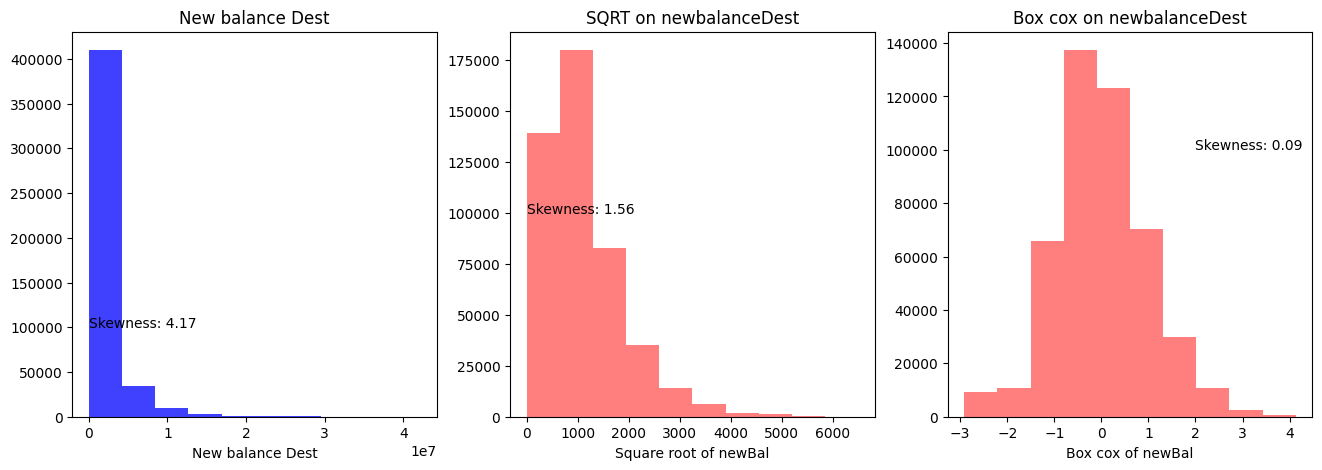

In [145]:
new_df['newBalanceDest_boxcox'] = preprocessing.scale(boxcox(new_df['newBalanceDest']+1)[0])

figure = plt.figure(figsize=(16, 5))
figure.add_subplot(131) 
plt.hist(new_df['newBalanceDest'] ,facecolor='blue',alpha=0.75) 
plt.xlabel("New balance Dest") 
plt.title("New balance Dest") 
plt.text(2,100000,"Skewness: {0:.2f}".format(skew(new_df['newBalanceDest'])))


figure.add_subplot(132)
plt.hist(np.sqrt(new_df['newBalanceDest']), facecolor = 'red', alpha=0.5)
plt.xlabel("Square root of newBal")
plt.title("SQRT on newbalanceDest")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(np.sqrt(new_df['newBalanceDest']))))

figure.add_subplot(133)
plt.hist(new_df['newBalanceDest_boxcox'], facecolor = 'red', alpha=0.5)
plt.xlabel("Box cox of newBal")
plt.title("Box cox on newbalanceDest")
plt.text(2, 100000, "Skewness: {0:.2f}".format(skew(new_df['newBalanceDest_boxcox'])))

plt.show()

In [146]:
new_df.head()

,step,type,amount,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest,isFraud,origBalance_inacc,destBalance_inacc,amount_boxcox,oldBalanceOrig_boxcox,newbalanceOrg_boxcox,oldBalanceDest_boxcox,newBalanceDest_boxcox
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1,0.00,181.0,-3.546110,0.038338,-0.345497,-1.901993,-2.914332
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1,0.00,21363.0,-3.546110,0.038338,-0.345497,-0.951768,-2.914332
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,-213808.94,182703.5,0.264634,0.842343,-0.345497,-1.231076,-1.470392
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,-214605.30,237735.3,0.205431,0.292901,-0.345497,-0.938791,-2.914332
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,-300850.89,-2401220.0,0.567498,0.782370,-0.345497,-1.195107,0.817361


In [147]:
print("The fraud transaction of the filtered dataset: {0:.4f}%".format((len(new_df[new_df.isFraud == 1])/len(new_df))*100))

The fraud transaction of the filtered dataset: 0.2480%


In [148]:
new_df.drop(["oldBalanceOrig", "newBalanceOrig", "oldBalanceDest", "newBalanceDest", "amount", "type", "origBalance_inacc", "destBalance_inacc", "step"], axis=1, inplace=True)
new_df.head()

,isFraud,amount_boxcox,oldBalanceOrig_boxcox,newbalanceOrg_boxcox,oldBalanceDest_boxcox,newBalanceDest_boxcox
2,1,-3.546110,0.038338,-0.345497,-1.901993,-2.914332
3,1,-3.546110,0.038338,-0.345497,-0.951768,-2.914332
15,0,0.264634,0.842343,-0.345497,-1.231076,-1.470392
19,0,0.205431,0.292901,-0.345497,-0.938791,-2.914332
24,0,0.567498,0.782370,-0.345497,-1.195107,0.817361


In [149]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 460394 entries, 2 to 1048570
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   isFraud                460394 non-null  int64  
 1   amount_boxcox          460394 non-null  float64
 2   oldBalanceOrig_boxcox  460394 non-null  float64
 3   newbalanceOrg_boxcox   460394 non-null  float64
 4   oldBalanceDest_boxcox  460394 non-null  float64
 5   newBalanceDest_boxcox  460394 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 24.6 MB


In [150]:
X = new_df.iloc[:, new_df.columns != 'isFraud']
y = new_df.iloc[:, new_df.columns == 'isFraud']

In [151]:
number_records_fraud = len(new_df[new_df.isFraud == 1])
fraud_indices = new_df[new_df.isFraud == 1].index.values
normal_indices = new_df[new_df.isFraud == 0].index

random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace = False)
random_normal_indices = np.array(random_normal_indices)

under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
under_sample_data = new_df.loc[under_sample_indices, :]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'isFraud']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'isFraud']

print("Percentage of normal transactions: ", len(under_sample_data[under_sample_data.isFraud == 0])/len(under_sample_data))
print("Percentage of fraud transactions: ", len(under_sample_data[under_sample_data.isFraud == 1])/len(under_sample_data))
print("Total number of transactions in resample data: ", len(under_sample_data))

Percentage of normal transactions:  0.5
Percentage of fraud transactions:  0.5
Total number of transactions in resample data:  2284


In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

print("Number of transactions in train dataset: ", format(len(X_train), ",d"))
print("Number of transactions in test dataset: ", format(len(X_test), ",d"))
print("Total number of transactions: ", format(len(X_train)+len(X_test),",d"))

X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state=0)

print("Number transactions train dataset: ", format(len(X_train_undersample),',d'))
print("Number transactions test dataset: ", format(len(X_test_undersample),',d'))
print("Total number of transactions: ", format(len(X_train_undersample)+len(X_test_undersample),',d'))

Number of transactions in train dataset:  322,275
Number of transactions in test dataset:  138,119
Total number of transactions:  460,394
Number transactions train dataset:  1,598
Number transactions test dataset:  686
Total number of transactions:  2,284


In [153]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_undersample = label_encoder.fit_transform(y_train_undersample.values.ravel())
y_test_undersample = label_encoder.fit_transform(y_test_undersample.values.ravel())

logreg = LogisticRegression()
logreg.fit(X_train_undersample, y_train_undersample)

LogisticRegression()

In [154]:
y_pred = logreg.predict(X_test_undersample)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test_undersample, y_test_undersample)))

Accuracy of logistic regression classifier on test set: 0.86
